# Table of contents:
#### 1. Importing libraries and datasets
#### 2. Addressing PII data
#### 3. Regional segmentation of the data
#### 4. Exclusion flag for low-activity customers
#### 5. Create a profiling variable
#### 6. Visualization to show distribution of profiles
#### 7. Aggregate max, mean and min variables on a customer-profile level for usage frequency and expenditure
#### 8. Compare your customer profiles with regions and departments
#### 9. Charts to illustrate the results
#### 10. Export final data set

## 1. Importing libraries and datasets

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy 

In [2]:
# Import datasets
path = r'C:\Users\raque\Documents\08-2023 Instacart Basket Analysis'
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [3]:
ords_prods_all.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,...,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,merge_cust
0,0,0,2539329,1,1,2,8,NaN,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,1,2398795,1,2,3,7,15.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,2,473747,1,3,3,12,21.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,3,2254736,1,4,4,7,29.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,4,431534,1,5,4,15,28.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [4]:
ords_prods_all.shape

(32404859, 37)

## 2. Addressing PII data

#### The names and surnames of the customers are sensitive information that could lead to track down individuals, for that reason it can be considered PII (personally identifiable information). To avoid privacy breaches I'm going to drop them.

In [5]:
# Dropping the 'first_name' and 'surname' columns due to PII
ords_prods_all = ords_prods_all.drop(columns=['first_name','surname'])

In [6]:
# Checking result
ords_prods_all.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,...,median_days_prior,order_regularity,gender,state,age,date_joined,n_dependants,fam_status,income,merge_cust
0,0,0,2539329,1,1,2,8,NaN,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,1,2398795,1,2,3,7,15.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,2,473747,1,3,3,12,21.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,3,2254736,1,4,4,7,29.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,4,431534,1,5,4,15,28.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


## 3. Regional segmentation of the data

In [7]:
# Assigning regions based on the state

region = []

for value in ords_prods_all["state"]:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']:
        region.append('West')
    else:
        region.append('South')

In [8]:
# Creating a the new column 'region' through the loop above
ords_prods_all['region'] = region

In [9]:
# Allow to show all the columns
pd.options.display.max_columns = None

In [10]:
ords_prods_all.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,merge2,price_range_loc,busiest_day,busiest_hour,max_order,loyalty_flag,avg_spends,type_spender,median_days_prior,order_regularity,gender,state,age,date_joined,n_dependants,fam_status,income,merge_cust,region
0,0,0,2539329,1,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,1,1,2398795,1,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2,2,473747,1,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,3,3,2254736,1,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,4,4,431534,1,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [11]:
# Counting customers grouped by region
ords_prods_all.groupby('region').nunique()['user_id']

region
Midwest      48519
Northeast    36388
South        68737
West         52565
Name: user_id, dtype: int64

In [12]:
spending_region = pd.crosstab(ords_prods_all['region'], ords_prods_all['loyalty_flag'], dropna = False)

In [13]:
spending_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744
South,3405844,2074410,5311631
West,2662690,1596800,4033423


## 4. Exclusion flag for low-activity customers

In [14]:
# Creating an exclusion flag for low-activity customers (>5 orders)
ords_prods_all.loc[ords_prods_all['max_order'] <= 5, 'order_activity'] = 'Low-activity customer'

In [15]:
# Creating a flag for high-activity customers (>5 orders)
ords_prods_all.loc[ords_prods_all['max_order'] > 5, 'order_activity'] = 'High-activity customer'

In [16]:
# Counting customers depending on activity
ords_prods_all.groupby('order_activity').nunique()['user_id']

order_activity
High-activity customer    146466
Low-activity customer      59743
Name: user_id, dtype: int64

In [17]:
# Creating a subset of the Low-activity customers
low_activity_cust = ords_prods_all[ords_prods_all['order_activity'] == 'Low-activity customer']

In [18]:
# Exporting the "low_activity_cust" subset
low_activity_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customers.pkl'))

In [19]:
# Creating a subset for the High-activity customers
high_activity_cust = ords_prods_all[ords_prods_all['order_activity'] == 'High-activity customer']

In [20]:
# Exporting the "high_activity_cust" subset
high_activity_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_customers.pkl'))

## 5. Create a profiling variable

### Age range labels

In [21]:
high_activity_cust.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,merge2,price_range_loc,busiest_day,busiest_hour,max_order,loyalty_flag,avg_spends,type_spender,median_days_prior,order_regularity,gender,state,age,date_joined,n_dependants,fam_status,income,merge_cust,region,order_activity
0,0,0,2539329,1,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer
1,1,1,2398795,1,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer
2,2,2,473747,1,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer
3,3,3,2254736,1,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer
4,4,4,431534,1,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer


In [22]:
# checking minimum age in the dataframe
high_activity_cust['age'].min()

18

In [23]:
# checking maximum age in the dataframe
high_activity_cust['age'].max()

81

In [24]:
# Assigning age range labels with loc function 
# from 18 to 29
high_activity_cust.loc[high_activity_cust['age'] <= 29, 'age_range'] = '18-29'
# from 30 to 39 
high_activity_cust.loc[(high_activity_cust['age'] >= 30) & (high_activity_cust['age'] <= 39), 'age_range'] = '30-39'
# from 40 to 49 
high_activity_cust.loc[(high_activity_cust['age'] >= 40) & (high_activity_cust['age'] <= 49), 'age_range'] = '40-49'
# from 50 to 59 
high_activity_cust.loc[(high_activity_cust['age'] >= 50) & (high_activity_cust['age'] <= 59), 'age_range'] = '50-59'
# from 60 to 69 
high_activity_cust.loc[(high_activity_cust['age'] >= 60) & (high_activity_cust['age'] <= 69), 'age_range'] = '60-69'
# +70
high_activity_cust.loc[high_activity_cust['age'] > 69, 'age_range'] = '70 and over'

C:\Users\raque\AppData\Local\Temp\ipykernel_22356\413113151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_cust.loc[high_activity_cust['age'] <= 29, 'age_range'] = '18-29'


In [25]:
high_activity_cust['age_range'].value_counts(dropna = False)

age_range
18-29          5668848
70 and over    5665851
40-49          4755385
30-39          4723673
50-59          4717733
60-69          4639934
Name: count, dtype: int64

### Income range labels

In [26]:
# checking maximum and minimum income
high_activity_cust['income'].describe().astype(int)

count    30171424
mean        99770
std         43183
min         25903
25%         67424
50%         96823
75%        128150
max        593901
Name: income, dtype: int32

In [86]:
# assigning income range labels with loc function

high_activity_cust.loc[high_activity_cust['income'] < 35000, 'income_range'] = 'Lower income'
high_activity_cust.loc[(high_activity_cust['income'] >= 35000) & (high_activity_cust['income'] < 50000), 'income_range'] = 'Average income'
high_activity_cust.loc[(high_activity_cust['income'] >= 50000) & (high_activity_cust['income'] < 125000), 'income_range'] = 'High income'
high_activity_cust.loc[high_activity_cust['income'] >= 125000, 'income_range'] = 'Really high income'

In [28]:
high_activity_cust['income_range'].value_counts(dropna = False)

income_range
High income           18845298
Really high income     8077292
Average income         2381811
Lower income            867023
Name: count, dtype: int64

In [29]:
high_activity_cust.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,merge2,price_range_loc,busiest_day,busiest_hour,max_order,loyalty_flag,avg_spends,type_spender,median_days_prior,order_regularity,gender,state,age,date_joined,n_dependants,fam_status,income,merge_cust,region,order_activity,age_range,income_range
0,0,0,2539329,1,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income
1,1,1,2398795,1,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income
2,2,2,473747,1,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income
3,3,3,2254736,1,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income
4,4,4,431534,1,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income


### Department data

In [30]:
# Importing department data
df_dep =pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [31]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [32]:
# Rename column
df_dep = df_dep.rename(columns = {'Unnamed: 0' : 'department_id'})

In [33]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### Variable for family situation

In [34]:
# Counting customers grouped by marital status
high_activity_cust.groupby('fam_status').nunique()['user_id']

fam_status
divorced/widowed                     12458
living with parents and siblings      6862
married                             102976
single                               24170
Name: user_id, dtype: int64

In [87]:
# Assigning family_type labels with loc function
high_activity_cust.loc[(high_activity_cust['fam_status'].isin(['single', 'living with parents and siblings', 'divorced/widowed'])) & (high_activity_cust['n_dependants'] ==0), 'fam_type'] = 'Single adult'
high_activity_cust.loc[(high_activity_cust['fam_status'].isin(['single', 'living with parents and siblings', 'divorced/widowed'])) & (high_activity_cust['n_dependants'] >0) & (high_activity_cust['age_range']=='18-29'), 'fam_type'] = 'Young one-parent'
high_activity_cust.loc[(high_activity_cust['fam_status'].isin(['single', 'living with parents and siblings', 'divorced/widowed'])) & (high_activity_cust['n_dependants'] >0), 'fam_type'] = 'One-parent'
high_activity_cust.loc[(high_activity_cust['fam_status']=='married') & (high_activity_cust['n_dependants'] <=3) & (high_activity_cust['age_range']=='18-29'), 'fam_type'] = 'Young family'
high_activity_cust.loc[(high_activity_cust['fam_status']=='married') & (high_activity_cust['n_dependants'] <=3), 'fam_type'] = 'Family'
high_activity_cust.loc[(high_activity_cust['fam_status']=='married') & (high_activity_cust['n_dependants'] >3), 'fam_type'] = 'Large family'

In [36]:
high_activity_cust.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,merge2,price_range_loc,busiest_day,busiest_hour,max_order,loyalty_flag,avg_spends,type_spender,median_days_prior,order_regularity,gender,state,age,date_joined,n_dependants,fam_status,income,merge_cust,region,order_activity,age_range,income_range,fam_type
0,0,0,2539329,1,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family
1,1,1,2398795,1,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family
2,2,2,473747,1,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family
3,3,3,2254736,1,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family
4,4,4,431534,1,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family


### Merging department dataframe with high customers df

In [37]:
# Merging the df_dep with high_active_cust dataframe
high_activity_cust_dep = high_activity_cust.merge(df_dep, on = 'department_id')

In [38]:
high_activity_cust_dep.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,merge2,price_range_loc,busiest_day,busiest_hour,max_order,loyalty_flag,avg_spends,type_spender,median_days_prior,order_regularity,gender,state,age,date_joined,n_dependants,fam_status,income,merge_cust,region,order_activity,age_range,income_range,fam_type,department
0,0,0,2539329,1,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages
1,1,1,2398795,1,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages
2,2,2,473747,1,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages
3,3,3,2254736,1,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages
4,4,4,431534,1,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages


### Assigning names to days of the week

In [39]:
high_activity_cust_dep.loc[high_activity_cust_dep['order_day_of_the_week'] == 0, 'day'] = 'Saturday'
high_activity_cust_dep.loc[high_activity_cust_dep['order_day_of_the_week'] == 1, 'day'] = 'Sunday'
high_activity_cust_dep.loc[high_activity_cust_dep['order_day_of_the_week'] == 2, 'day'] = 'Monday'
high_activity_cust_dep.loc[high_activity_cust_dep['order_day_of_the_week'] == 3, 'day'] = 'Tuesday'
high_activity_cust_dep.loc[high_activity_cust_dep['order_day_of_the_week'] == 4, 'day'] = 'Wednesday'
high_activity_cust_dep.loc[high_activity_cust_dep['order_day_of_the_week'] == 5, 'day'] = 'Thurday'
high_activity_cust_dep.loc[high_activity_cust_dep['order_day_of_the_week'] == 6, 'day'] = 'Friday'

In [40]:
high_activity_cust_dep.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,merge2,price_range_loc,busiest_day,busiest_hour,max_order,loyalty_flag,avg_spends,type_spender,median_days_prior,order_regularity,gender,state,age,date_joined,n_dependants,fam_status,income,merge_cust,region,order_activity,age_range,income_range,fam_type,department,day
0,0,0,2539329,1,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages,Monday
1,1,1,2398795,1,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages,Tuesday
2,2,2,473747,1,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages,Tuesday
3,3,3,2254736,1,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages,Wednesday
4,4,4,431534,1,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages,Wednesday


## 6. Visualization to show distribution of profiles

Text(0.5, 1.0, 'Distribution of Age Range')

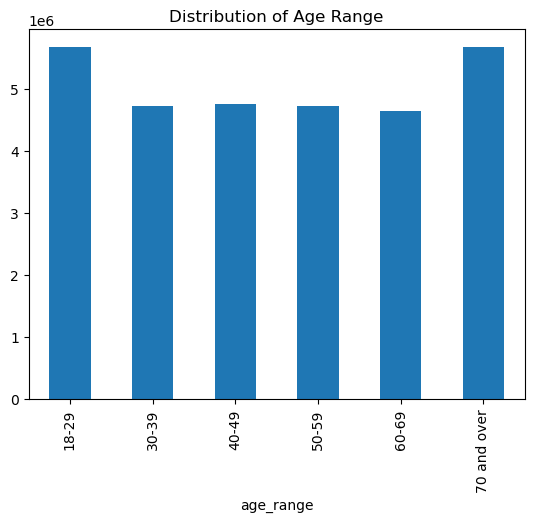

In [41]:
# Creating bar chart for age_range 
bar_age_range = high_activity_cust_dep['age_range'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Age Range')

In [42]:
# Exporting bar chart
bar_age_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_range.png'), bbox_inches="tight")

Text(0.5, 1.0, 'Distribution of Income Range')

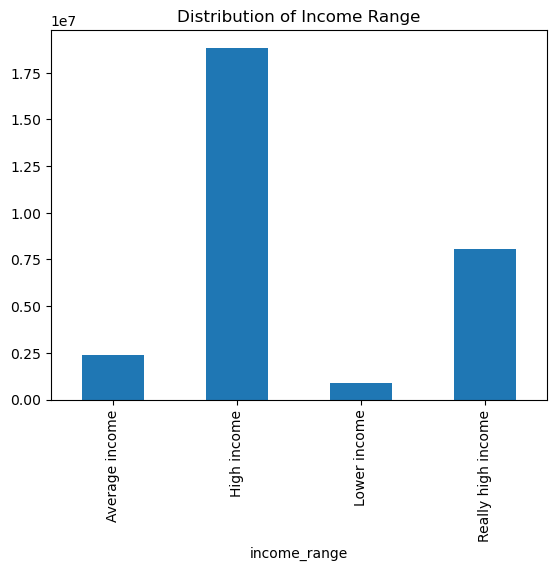

In [43]:
# Creating bar chart for income_range 
bar_income_range = high_activity_cust_dep['income_range'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Income Range')

In [44]:
# Exporting bar chart
bar_income_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_range.png'), bbox_inches="tight")

Text(0.5, 1.0, 'Distribution of orders by departments')

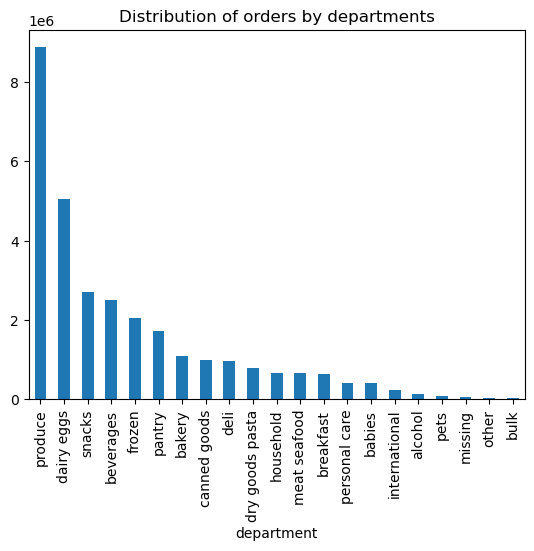

In [45]:
# Bar chart showing products with the highest frequency of order
order_dep_bar = high_activity_cust_dep['department'].value_counts().plot.bar()
plt.title('Distribution of orders by departments')

In [46]:
# Exporting order_dep bar chart
order_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'order_dep_bar.png'), bbox_inches="tight")

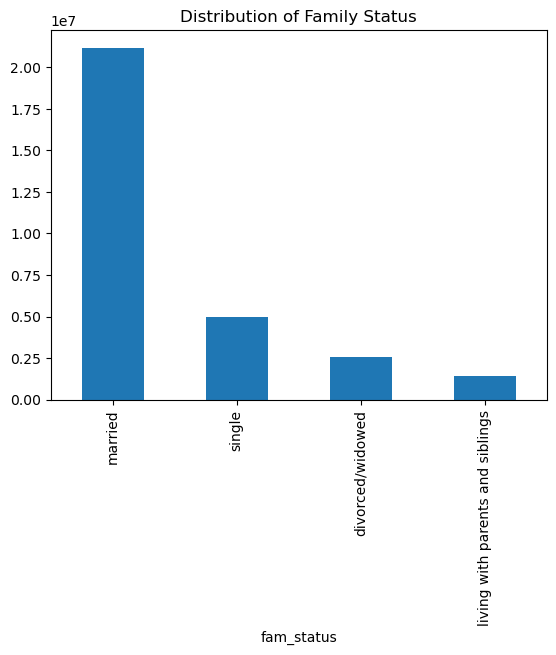

In [47]:
# Creating a bar chart for fam_status
bar_fam_status = high_activity_cust_dep['fam_status'].value_counts().plot.bar(title = 'Distribution of Family Status')

In [48]:
# Exporting order_dep bar chart
bar_fam_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'bar_fam_status.png'), bbox_inches="tight")

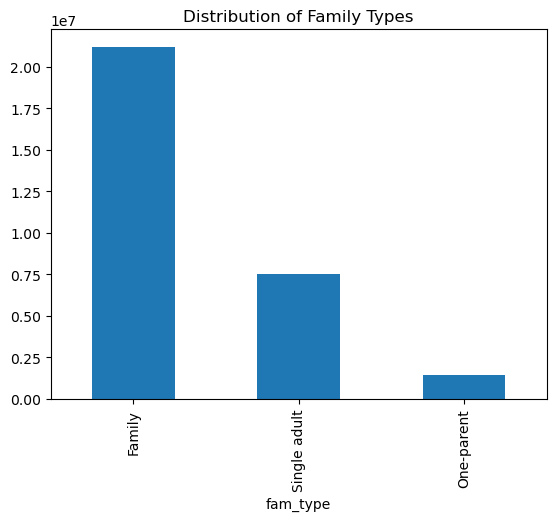

In [49]:
# Creating a bar chart for fam_status
bar_fam_type = high_activity_cust_dep['fam_type'].value_counts().plot.bar(title = 'Distribution of Family Types')

In [50]:
# Exporting order_dep bar chart
bar_fam_type.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'bar_fam_type.png'), bbox_inches="tight")

In [51]:
# Creating a crosstab with income_range and age_range
age_income_tab = pd.crosstab(high_activity_cust_dep['age_range'],high_activity_cust_dep['income_range'],dropna=False)

In [52]:
age_income_tab

income_range,Average income,High income,Lower income,Really high income
age_range,,,,
18-29,625179,4730099,245472,68098
30-39,535654,3938930,192563,56526
40-49,294052,2574421,107962,1778950
50-59,300317,2382939,104752,1929725
60-69,283739,2331097,97058,1928040
70 and over,342870,2887812,119216,2315953


Text(0.5, 1.0, 'Income range acrross age groups')

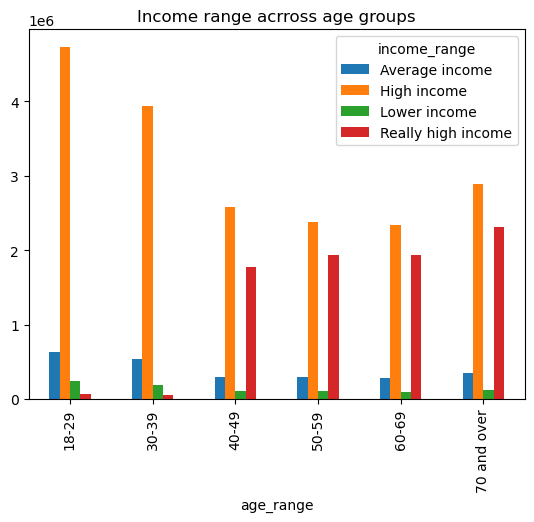

In [53]:
# Creating a bar chart for
# sort_index to do it in index order instead of highest to lowest frequency
age_income_bar = age_income_tab.sort_index().plot.bar()
plt.title('Income range acrross age groups')

In [54]:
# Exporting bar chart
age_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'age_income_bar.png'), bbox_inches='tight')

## 7. Aggregate max, mean and min variables on a customer-profile level for usage frequency and expenditure

In [55]:
# Variable aggregation
income_profile = high_activity_cust_dep.groupby('income_range',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [56]:
income_profile

days_since_last_order                  prices        \
                                     min   max       mean    min   max   
income_range                                                             
Average income                       0.0  30.0  10.867378    1.0  25.0   
High income                          0.0  30.0  10.599659    1.0  25.0   
Lower income                         0.0  30.0  11.152923    1.0  25.0   
Really high income                   0.0  30.0  10.588584    1.0  25.0   

                              
                        mean  
income_range                  
Average income      6.787669  
High income         7.908035  
Lower income        6.501916  
Really high income  7.948505

## 8. Compare your customer profiles with regions and departments

In [57]:
# Checking income by departments
income_dep = pd.crosstab(high_activity_cust_dep['department'],high_activity_cust_dep['income_range'], dropna = False)

In [58]:
income_dep

income_range,Average income,High income,Lower income,Really high income
department,,,,
alcohol,12498,80673,4606,41796
babies,22040,262427,6416,112183
bakery,77017,686969,25938,302564
beverages,269140,1490802,102446,644853
breakfast,63828,394938,24870,169783
bulk,3389,20327,1199,7926
canned goods,56906,630701,18576,275858
dairy eggs,360629,3194500,125511,1372800
deli,75258,613878,27459,261455


In [59]:
# Checking age_range by deparment
age_range_dep = pd.crosstab(high_activity_cust_dep['department'],high_activity_cust_dep['age_range'], dropna = False)

In [60]:
age_range_dep

age_range,18-29,30-39,40-49,50-59,60-69,70 and over
department,,,,,,
alcohol,26887,22959,21679,22211,20737,25100
babies,76416,62701,65958,62070,61646,74275
bakery,205042,171202,172138,171297,167786,205023
beverages,465694,386358,396195,397015,384460,477519
breakfast,124799,101168,103417,102079,98862,123094
bulk,6302,5101,5297,4919,5098,6124
canned goods,186436,152921,154104,154445,151739,182396
dairy eggs,953186,797446,800028,781957,770465,950358
deli,183692,153176,154277,152136,151469,183300


In [61]:
# Checking fam_status & number of dependants
fam_status_ndep = pd.crosstab(high_activity_cust_dep['fam_status'],high_activity_cust_dep['n_dependants'], dropna = False)

In [62]:
fam_status_ndep

n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2577880,0,0,0
living with parents and siblings,0,495834,472168,476079
married,0,7027809,7059586,7100735
single,4961333,0,0,0


In [63]:
# Checking fam_status by deparment
fam_status_dep = pd.crosstab(high_activity_cust_dep['department'], high_activity_cust_dep['fam_status'], dropna = False)

In [64]:
fam_status_dep

fam_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,11376,8069,96035,24093
babies,33567,19008,282645,67846
bakery,93297,52381,766010,180800
beverages,215425,116148,1761916,413752
breakfast,55090,32355,459157,106817
bulk,2619,1615,23391,5216
canned goods,81776,46946,691487,161832
dairy eggs,432405,244460,3545576,830999
deli,84521,46963,684423,162143


In [65]:
# Checking income_range & number of dependants
income_range_ndep = pd.crosstab(high_activity_cust_dep['income_range'],high_activity_cust_dep['n_dependants'], dropna = False)

In [66]:
income_range_ndep

n_dependants,0,1,2,3
income_range,,,,
Average income,600537,586719,595709,598846
High income,4674515,4734325,4695148,4741310
Lower income,218188,210719,226160,211956
Really high income,2045973,1991880,2014737,2024702


In [67]:
# Checking fam_type & region
fam_type_region = pd.crosstab(high_activity_cust_dep['region'],high_activity_cust_dep['fam_type'], dropna = False)

In [68]:
fam_type_region

fam_type,Family,One-parent,Single adult
region,,,
Midwest,4953461,342691,1773970
Northeast,3757318,249894,1317139
South,7040655,492724,2516780
West,5436696,358772,1931324


In [69]:
# Checking age_range & region
age_region = pd.crosstab(high_activity_cust_dep['region'],high_activity_cust_dep['age_range'], dropna = False)

In [70]:
age_region

age_range,18-29,30-39,40-49,50-59,60-69,70 and over
region,,,,,,
Midwest,1322699,1097798,1144531,1116650,1079488,1308956
Northeast,996088,826196,837725,829282,821836,1013224
South,1909653,1608276,1558358,1539912,1549417,1884543
West,1440408,1191403,1214771,1231889,1189193,1459128


## 9. Charts to illustrate the results

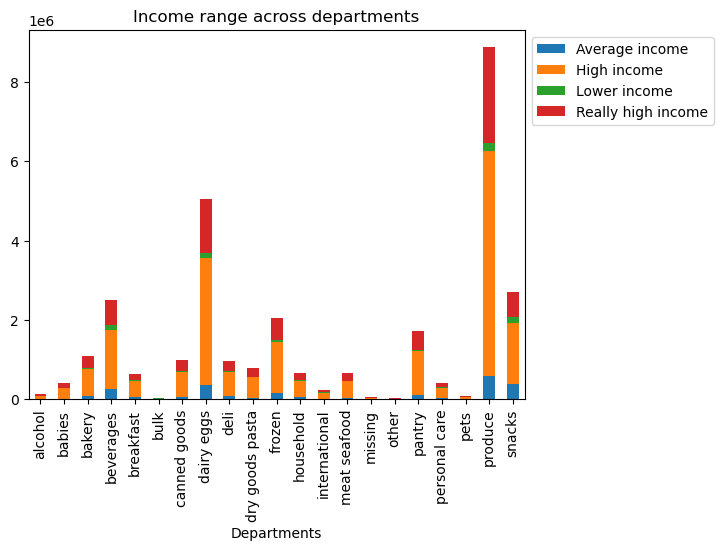

In [71]:
# Creating a stacked bar chart for income range across departments
income_dep_bar = income_dep.plot.bar(stacked=True, title = 'Income range across departments')
plt.xlabel("Departments")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [72]:
# Exporting income_dep_bar bar chart
income_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'income_dep_bar.png'), bbox_inches='tight')

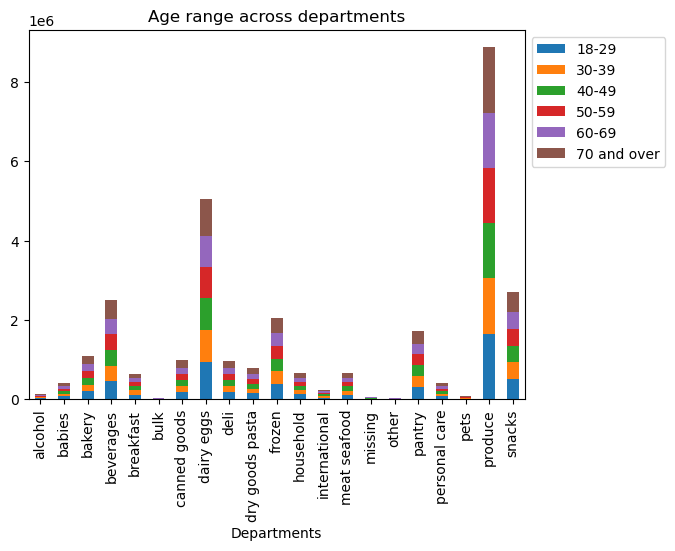

In [73]:
# Creating a stacked bar chart for age range across departments
age_range_dep_bar = age_range_dep.plot.bar(stacked=True, title = 'Age range across departments')
plt.xlabel("Departments")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [74]:
# Exporting age_range_dep_bar bar chart
age_range_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'age_range_dep_bar.png'),bbox_inches='tight')

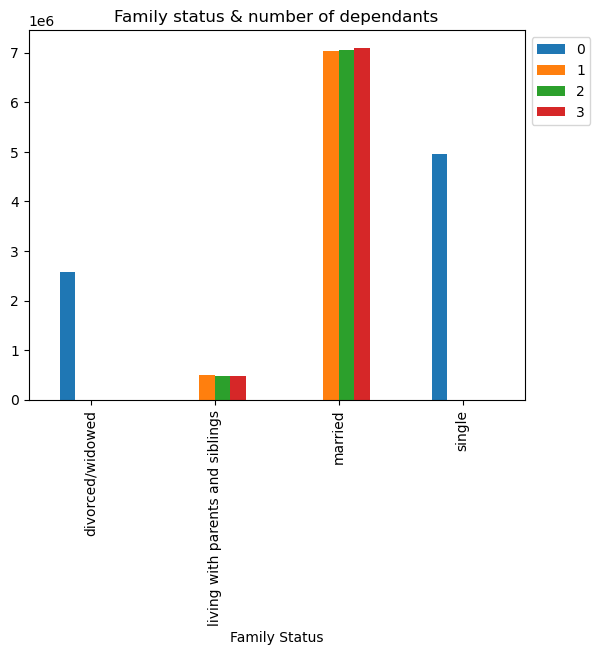

In [75]:
# Creating bar chart for family status & number of dependants
fam_status_ndep = fam_status_ndep.plot.bar(title = 'Family status & number of dependants')
plt.xlabel("Family Status")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [76]:
# Exporting fam_status_ndep
fam_status_ndep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'fam_status_ndep.png'),bbox_inches='tight')

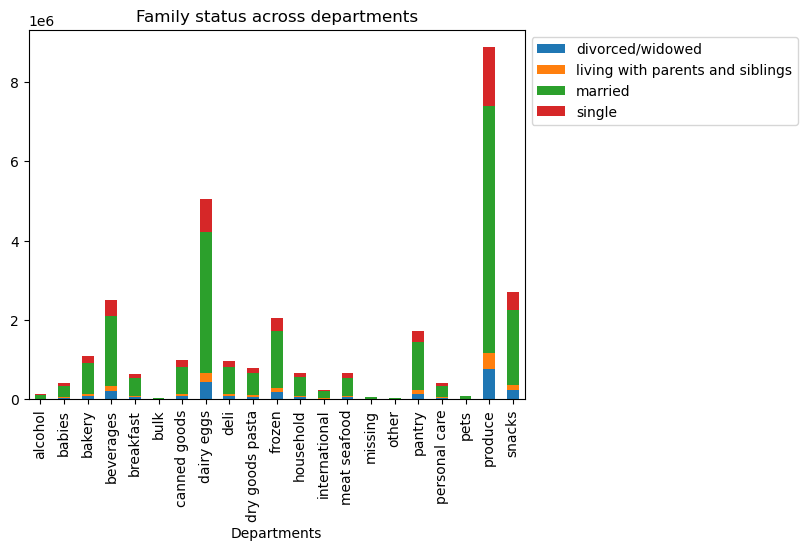

In [77]:
# Creating a stacked bar chart for fam_satus across departments
fam_status_dep_bar = fam_status_dep.plot.bar(stacked=True, title = 'Family status across departments')
plt.xlabel("Departments")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [78]:
# Exporting fam_status_dep_bar bar chart
fam_status_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'fam_status_dep_bar.png'), bbox_inches='tight')

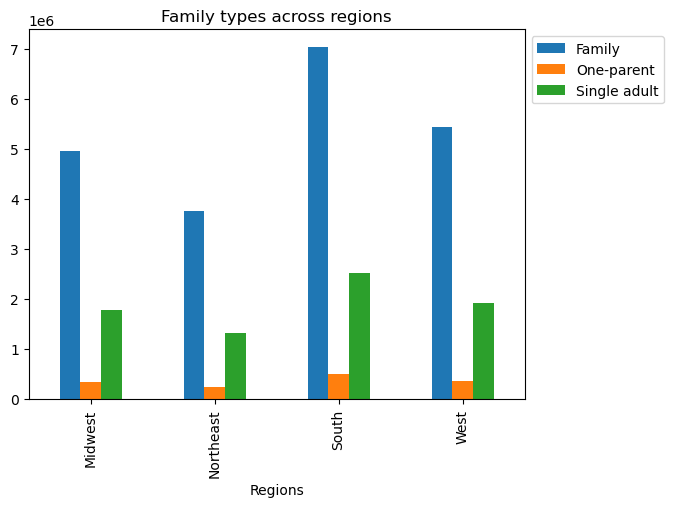

In [79]:
# Creating a bar chart for fam_type across regions
fam_type_region_bar = fam_type_region.plot.bar(title = 'Family types across regions')
plt.xlabel("Regions")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [80]:
# Exporting fam_status_dep_bar bar chart
fam_type_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'fam_type_region_bar.png'), bbox_inches='tight')

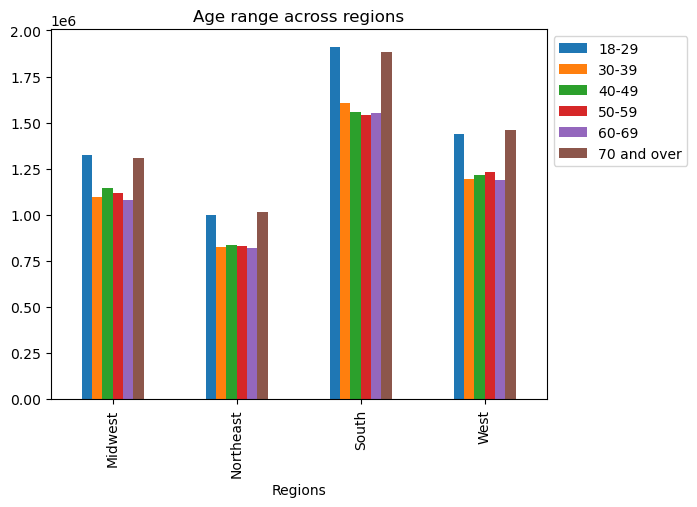

In [81]:
# Creating a bar chart for age across regions
age_region_bar = age_region.plot.bar(title = 'Age range across regions')
plt.xlabel("Regions")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [82]:
# Exporting fam_status_dep_bar bar chart
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'age_region_bar.png'), bbox_inches='tight')

## 10. Export final data set

In [83]:
high_activity_cust_dep.shape

(30171424, 42)

In [84]:
high_activity_cust_dep.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,merge2,price_range_loc,busiest_day,busiest_hour,max_order,loyalty_flag,avg_spends,type_spender,median_days_prior,order_regularity,gender,state,age,date_joined,n_dependants,fam_status,income,merge_cust,region,order_activity,age_range,income_range,fam_type,department,day
0,0,0,2539329,1,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages,Monday
1,1,1,2398795,1,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages,Tuesday
2,2,2,473747,1,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages,Tuesday
3,3,3,2254736,1,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages,Wednesday
4,4,4,431534,1,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High-activity customer,30-39,Average income,Family,beverages,Wednesday


In [85]:
# Exporting dataframe
high_activity_cust_dep.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cust_dep_final.pkl'))